# Steps

## 1. Import the data, examine variables such as Dt_Customer and Income to verify their accurate importation.
## 2.	There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning. 

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
marketing_data_df = pd.read_csv('marketing_data.csv')

In [14]:
marketing_data_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [15]:
# Function to calculate and display dataset size information

def analyze_dataset_size(df, name):
    # Calculate memory usage
    memory_usage = df.memory_usage(deep=True).sum()
    memory_mb = memory_usage / (1024 * 1024)

    # Calculate number of rows and columns
    rows = df.shape[0]
    columns = df.shape[1]

    print(f"Dataset: {name}")
    print(f"Rows: {rows:,}")
    print(f"Columns: {columns}")
    print(f"Memory Usage: {memory_mb:.2f} MB")
    print(f"Bytes per Row: {memory_usage / rows:.2f} bytes")
    print("-" * 50)

# Analyze dataset sizes
analyze_dataset_size(marketing_data_df, "marketing_data")



Dataset: marketing_data
Rows: 2,240
Columns: 28
Memory Usage: 1.08 MB
Bytes per Row: 503.41 bytes
--------------------------------------------------


Note: The memory analysis above confirms that our datasets easily fit into memory on modern computers. Even with the largest dataset (sales), the memory consumption is manageable for in-memory processing. This means we won't need to implement out-of-core processing techniques for our analysis and modeling.

In [31]:
def load_and_clean_data(marketing_df):
    """
    this code cleans income and Dt_Customer columns.

    Parameters:
    filepath (str): Path to the CSV file or downloaded file containing marketing data.

    Returns:
    pd.DataFrame: Cleaned dataset with correct data types and formats.
    """

    # Cleaning 'Income' column: Removing currency symbols and commas, converting to float
    marketing_df[' Income '] = marketing_df[' Income '].str.replace(r'[\$,]', '', regex=True).astype(float)

    # Converting 'Dt_Customer' to datetime format
    marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'], format='%m/%d/%y')

    return marketing_df


In [32]:
# Load and clean data
marketing_df = load_and_clean_data(marketing_data_df)
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,21474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,66476.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,31056.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,46310.0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,65819.0


In this code, the function load_and_clean_data was created to perform essential data cleaning steps on the marketing dataset. Specifically, it addresses formatting issues by removing currency symbols ($) and commas from the 'Income' column, converting it to a numeric format (float), and transforming the 'Dt_Customer' column from a string into a datetime format. These corrections ensure the dataset is properly formatted and suitable for subsequent exploratory analyses and hypothesis testing

In [33]:
def impute_missing_income(data):
    """
    Imputes missing values in the 'Income' column based on average income grouped by 'Education' and 'Marital_Status'.

    Parameters:
    data (pd.DataFrame): Dataset with potential missing values in the 'Income' column.

    Returns:
    pd.DataFrame: Dataset with imputed 'Income' values.
    """
    # Calculate mean income by 'Education' and 'Marital_Status'
    income_means = data.groupby(['Education', 'Marital_Status'])['Income'].mean()

    # Impute function using group averages
    def impute(row):
        if pd.isnull(row['Income']):
            return income_means.loc[row['Education'], row['Marital_Status']]
        return row['Income']

    data['Income'] = data.apply(impute, axis=1)

    return data


# Impute missing income values
marketing_df = impute_missing_income(marketing_data_df)

 # Verify no missing values remain
missing_count = marketing_data_df['Income'].isnull().sum()
print(f"Remaining missing income values: {missing_count}")

# Display first few rows of the cleaned data
print(marketing_data_df.head())


Remaining missing income values: 0
      ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2014-06-16        0       189  ...                  1             0   
1  2014-06-15        0       464  ...                  5             0   
2  2014-05-13        0       134  ...                  2             0   
3  2014-05-11        0        10  ...                  7             0   
4  2014-04-08        0         6  ...                  7             1   

   AcceptedCmp4  AcceptedCmp5  Accepted

### Note for step 1 and step 2: 
In this step, the marketing dataset was imported and initially inspected to verify correct loading, particularly focusing on columns such as Dt_Customer and Income. The dataset's memory usage was analyzed to confirm suitability for in-memory processing, ensuring computational efficiency. Subsequently, the Income column was " cleaned by removing formatting characters like currency symbols and commas and converting it to numeric format, while Dt_Customer was converted into a proper datetime format" .

Finally, missing values in the Income column were imputed using the average income grouped by Education and Marital_Status, resulting in a complete dataset with no remaining missing values.

## 3.	Create variables to represent the total number of children, age, and total spending.

a.	Derive the total purchases from the number of transactions across the three channels.


In [36]:
from datetime import datetime

# Function to create new variables in the dataset
def create_additional_variables(df):
    """
    Adds derived variables including total number of children, customer's age, total spending,
    and total purchases across three transaction channels.

    Parameters:
    df: The original marketing dataset.

    Returns:
     Dataset with additional derived columns.
    """

    # Total number of children at home
    df['Total_Children'] = df['Kidhome'] + df['Teenhome']

    # Customer's age based on current year
    df['Age'] = datetime.now().year - df['Year_Birth']

    # Total spending across all product categories
    spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    df['Total_Spending'] = df[spending_columns].sum(axis=1)

    # Total purchases from transactions across web, catalog, and store
    purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
    df['Total_Purchases'] = df[purchase_channels].sum(axis=1)

    return df

# Example usage:
marketing_df = create_additional_variables(marketing_data_df)
print(marketing_df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())


   Total_Children  Age  Total_Spending  Total_Purchases
0               0   55            1190               14
1               0   64             577               17
2               1   67             251               10
3               2   58              11                3
4               1   36              91                6


## 4.	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

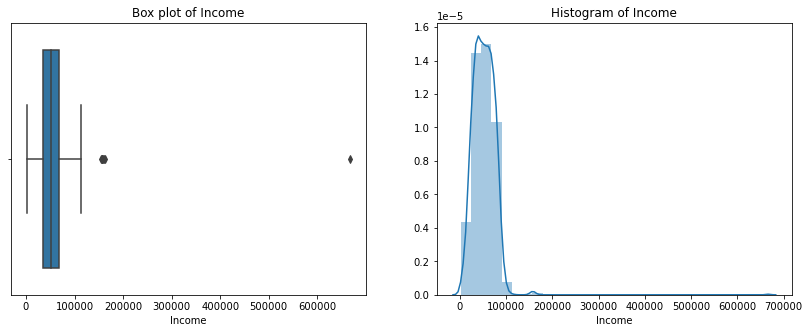

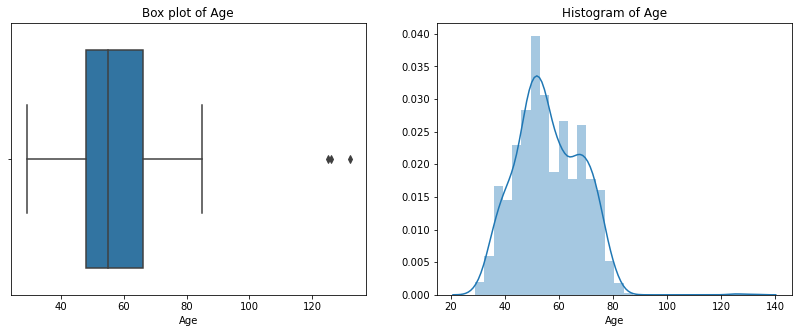

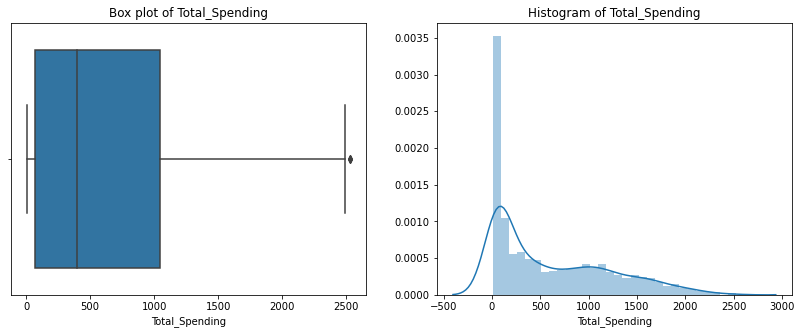

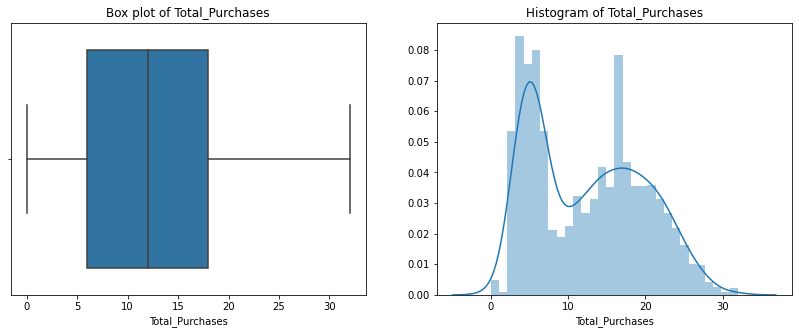

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize distributions and treat outliers
def visualize_and_treat_outliers(df, columns):
    """
    Generates box plots and histograms to inspect data distributions,
    identifies outliers, and applies IQR-based outlier treatment.

    Parameters:
    df (pd.DataFrame): The dataset to analyze.
    columns (list): List of column names to check for outliers.

    Returns:
    pd.DataFrame: Dataset with treated outliers.
    """
    for column in columns:
        plt.figure(figsize=(14, 5))

        # Box plot to identify outliers visually
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')

        # Histogram (using distplot for compatibility)
        plt.subplot(1, 2, 2)
        sns.distplot(df[column], bins=30, kde=True)
        plt.title(f'Histogram of {column}')

        plt.show()
        
        # Outlier treatment using IQR(IQR performs outlier detection and treatment
        # to handle extreme values that may skew data analyses.)
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Treating outliers by capping them at bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Example usage:
columns_to_check = ['Income', 'Age', 'Total_Spending', 'Total_Purchases']
marketing_df = visualize_and_treat_outliers(marketing_df, columns_to_check)


## 5.	Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

def encode_categorical_variables(df):
    """
    Applies ordinal and one-hot encoding to appropriate categorical variables.

    - Ordinal encoding is applied to Education levels (which have an inherent order).
    - One-hot encoding is applied to nominal variables such as Marital_Status and Country.

    Parameters:
    df (pd.DataFrame): The original marketing dataset.

    Returns:
    pd.DataFrame: Dataset with encoded categorical variables.
    """
    # --- Ordinal Encoding ---
    # Define ordered categories for 'Education'
    education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
    ordinal_encoder = OrdinalEncoder(categories=[education_order])
    df['Education_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])

    # --- One-Hot Encoding ---
    # Select nominal categorical variables for one-hot encoding
    one_hot_columns = ['Marital_Status', 'Country']
    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

    return df

# Example usage

marketing_df = encode_categorical_variables(marketing_data_df)
print(marketing_df.head())


      ID  Year_Birth   Education   Income   Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation   84835.0        0         0  2014-06-16   
1      1        1961  Graduation   57091.0        0         0  2014-06-15   
2  10476        1958  Graduation   67267.0        0         1  2014-05-13   
3   1386        1967  Graduation   32474.0        1         1  2014-05-11   
4   5371        1989  Graduation   21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0        0       189        104  ...                        0   
1        0       464          5  ...                        0   
2        0       134         11  ...                        0   
3        0        10          0  ...                        1   
4        0         6         16  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Country_CA  Country_GER  \
0                     0                    0           0            0   


## Notes for Step 5 :

. Ordinal Encoding: We encode Education using a specified logical order of education levels.

. One-Hot Encoding: Applied to Marital_Status and Country, which are nominal (unordered) variables.
drop_first=True avoids multicollinearity by removing one dummy variable per category.

## 6. Generate a heatmap to illustrate the correlation between different pairs of variables.

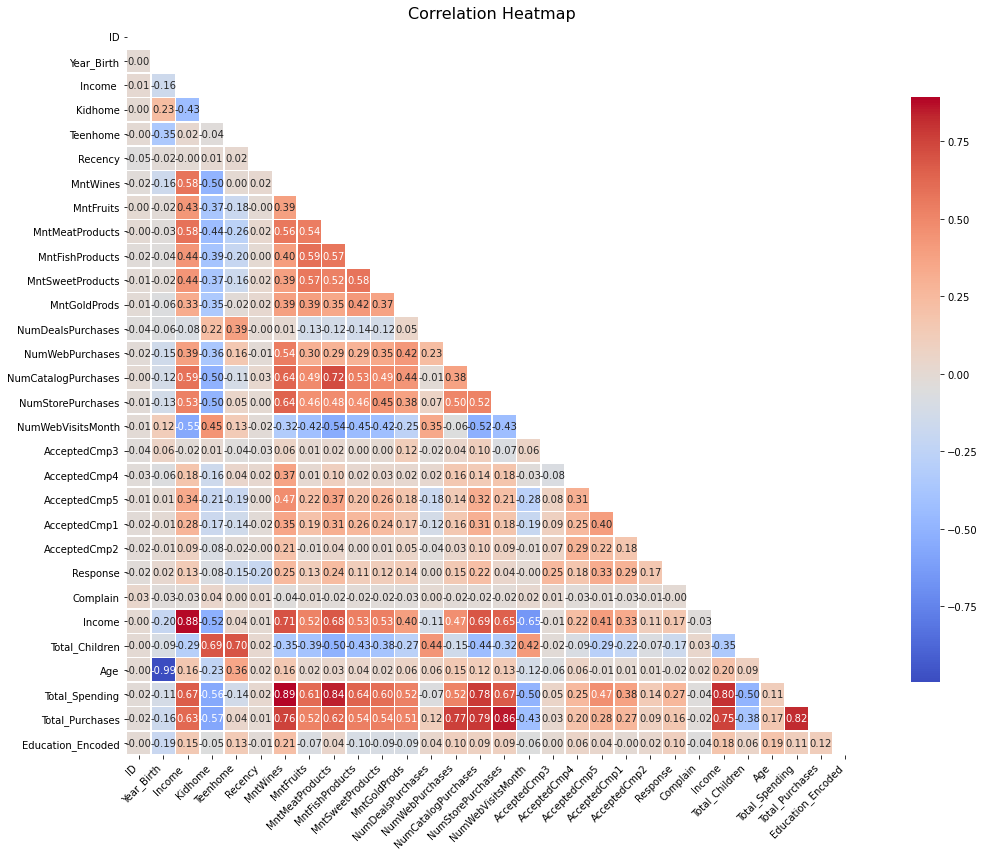

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_correlation_heatmap(df, figsize=(16, 12), annot=True, annot_fontsize=10, mask_upper=True):
    """
    Plots a clearer and more readable correlation heatmap.

    Parameters:
    df (pd.DataFrame): The dataset containing numerical variables.
    figsize (tuple): Size of the heatmap figure.
    annot (bool): Whether to annotate the heatmap with correlation values.
    annot_fontsize (int): Font size of annotations inside the heatmap.
    mask_upper (bool): Whether to hide the upper triangle for better readability.

    Returns:
    None
    """
    # Select numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Compute correlation matrix
    corr = numeric_df.corr()

    # Optionally mask the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool)) if mask_upper else None

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Draw the heatmap
    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        annot=annot,
        fmt=".2f",
        annot_kws={"size": annot_fontsize},
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
    )

    plt.title("Correlation Heatmap", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_correlation_heatmap(marketing_data_df)



## 7.	Test the following hypotheses:
a.	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

b.	Customers with children likely experience time constraints, making online shopping a more convenient option.

c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

d.	Does the United States significantly outperform the rest of the world in total purchase volumes?


In [55]:
 marketing_data_df[marketing_data_df['Total_Children'] > 0]['NumWebPurchases']

2       3
3       1
4       3
7       2
8       6
       ..
2234    9
2235    5
2236    1
2237    6
2239    8
Name: NumWebPurchases, Length: 1602, dtype: int64

In [56]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def test_hypotheses(df):
    results = {}

    # a. Age vs Store Purchases (Older people prefer in-store)
    older = df[df['Age'] >= df['Age'].median()]['NumStorePurchases']
    younger = df[df['Age'] < df['Age'].median()]['NumStorePurchases']
    t_stat_a, p_val_a = stats.ttest_ind(older, younger, equal_var=False)
    results['Age_vs_Store'] = (t_stat_a, p_val_a)

    # b. Children vs Web Purchases (Parents shop more online)
    has_children = df[df['Total_Children'] > 0]['NumWebPurchases']
    no_children = df[df['Total_Children'] == 0]['NumWebPurchases']
    t_stat_b, p_val_b = stats.ttest_ind(has_children, no_children, equal_var=False)
    results['Children_vs_Web'] = (t_stat_b, p_val_b)

    # c. Store vs Other Channels (Catalog + Web) - Cannibalization
    total_other_channels = df['NumWebPurchases'] + df['NumCatalogPurchases']
    correlation_c = stats.pearsonr(df['NumStorePurchases'], total_other_channels)
    results['Store_vs_OtherChannels'] = correlation_c

    # d. US vs Other Countries (Total Purchases)
    df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
    us_total = df[df['Country'] == 'US']['Total_Purchases']
    rest_total = df[df['Country'] != 'US']['Total_Purchases']
    t_stat_d, p_val_d = stats.ttest_ind(us_total, rest_total, equal_var=False)
    results['US_vs_ROW'] = (t_stat_d, p_val_d)

    return results

# Example usage
hypothesis_results = test_hypotheses(marketing_data_df)

# Display results
for test, (stat, pval) in hypothesis_results.items():
    print(f"\n{test}:\n  t-statistic or correlation: {stat:.3f}\n  p-value: {pval:.5f}")
    if pval < 0.05:
        print("  🔍 Statistically significant")
    else:
        print("  ❌ Not statistically significant")



Age_vs_Store:
  t-statistic or correlation: 6.563
  p-value: 0.00000
  🔍 Statistically significant

Children_vs_Web:
  t-statistic or correlation: -3.542
  p-value: 0.00041
  🔍 Statistically significant

Store_vs_OtherChannels:
  t-statistic or correlation: 0.615
  p-value: 0.00000
  🔍 Statistically significant

US_vs_ROW:
  t-statistic or correlation: 1.468
  p-value: 0.14468
  ❌ Not statistically significant


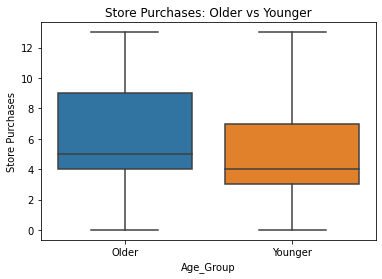

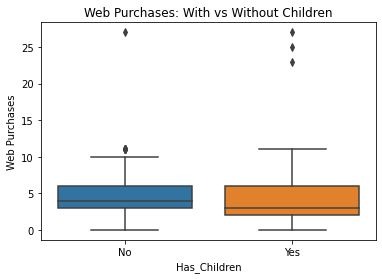

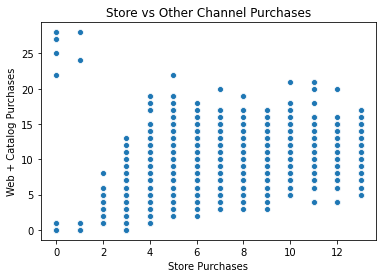

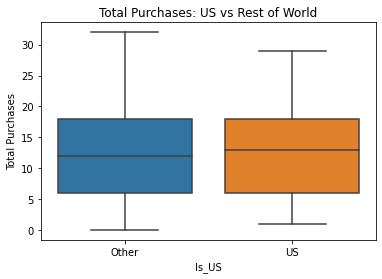


Age_vs_Store:
  Statistic: 6.563
  P-Value: 0.00000
  🔍 Significant

Children_vs_Web:
  Statistic: -3.542
  P-Value: 0.00041
  🔍 Significant

Store_vs_OtherChannels:
  Statistic: 0.615
  P-Value: 0.00000
  🔍 Significant

US_vs_ROW:
  Statistic: 1.468
  P-Value: 0.14468
  ❌ Not Significant


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def test_and_plot_hypotheses(df):
    results = {}

    # a. Age vs Store Purchases
    df['Age_Group'] = ['Older' if age >= df['Age'].median() else 'Younger' for age in df['Age']]
    t_stat_a, p_val_a = stats.ttest_ind(
        df[df['Age_Group'] == 'Older']['NumStorePurchases'],
        df[df['Age_Group'] == 'Younger']['NumStorePurchases'],
        equal_var=False
    )
    results['Age_vs_Store'] = (t_stat_a, p_val_a)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Age_Group', y='NumStorePurchases', data=df)
    plt.title('Store Purchases: Older vs Younger')
    plt.ylabel('Store Purchases')
    plt.show()

    # b. Children vs Web Purchases
    df['Has_Children'] = ['Yes' if c > 0 else 'No' for c in df['Total_Children']]
    t_stat_b, p_val_b = stats.ttest_ind(
        df[df['Has_Children'] == 'Yes']['NumWebPurchases'],
        df[df['Has_Children'] == 'No']['NumWebPurchases'],
        equal_var=False
    )
    results['Children_vs_Web'] = (t_stat_b, p_val_b)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Has_Children', y='NumWebPurchases', data=df)
    plt.title('Web Purchases: With vs Without Children')
    plt.ylabel('Web Purchases')
    plt.show()

    # c. Store vs Other Channels
    df['Other_Channels'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
    corr_c, p_corr_c = stats.pearsonr(df['NumStorePurchases'], df['Other_Channels'])
    results['Store_vs_OtherChannels'] = (corr_c, p_corr_c)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='NumStorePurchases', y='Other_Channels', data=df)
    plt.title('Store vs Other Channel Purchases')
    plt.xlabel('Store Purchases')
    plt.ylabel('Web + Catalog Purchases')
    plt.show()

    # d. US vs Rest of World
    df['Is_US'] = ['US' if country == 'US' else 'Other' for country in df['Country']]
    t_stat_d, p_val_d = stats.ttest_ind(
        df[df['Is_US'] == 'US']['Total_Purchases'],
        df[df['Is_US'] == 'Other']['Total_Purchases'],
        equal_var=False
    )
    results['US_vs_ROW'] = (t_stat_d, p_val_d)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Is_US', y='Total_Purchases', data=df)
    plt.title('Total Purchases: US vs Rest of World')
    plt.ylabel('Total Purchases')
    plt.show()

    return results

# Run the analysis and plot
hypothesis_results = test_and_plot_hypotheses(marketing_data_df)

# Print results
for key, (stat, pval) in hypothesis_results.items():
    print(f"\n{key}:\n  Statistic: {stat:.3f}\n  P-Value: {pval:.5f}")
    print("  🔍 Significant" if pval < 0.05 else "  ❌ Not Significant")


## 8.	Use appropriate visualization to help analyze the following:
    
a.	Identify the top-performing products and those with the lowest revenue.

b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

c.	Determine the country with the highest number of customers who accepted the last campaign.

d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

e.	Analyze the educational background of customers who lodged complaints in the last two years.


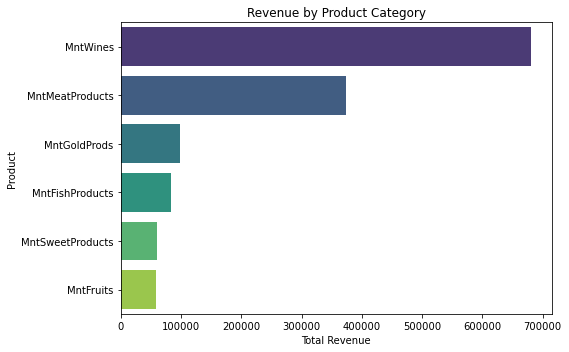

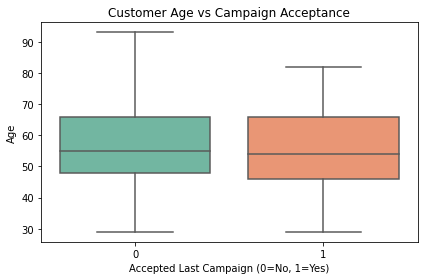

Correlation between Age and Campaign Acceptance: -0.020


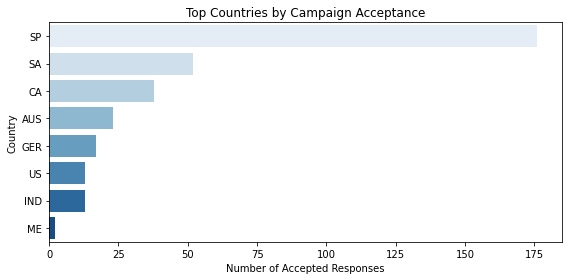

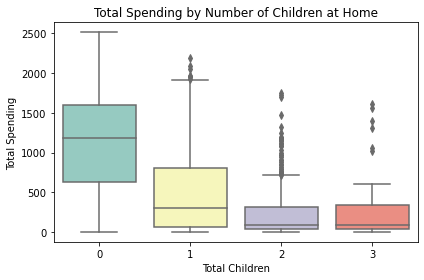

Correlation between Children at Home and Total Spending: -0.499


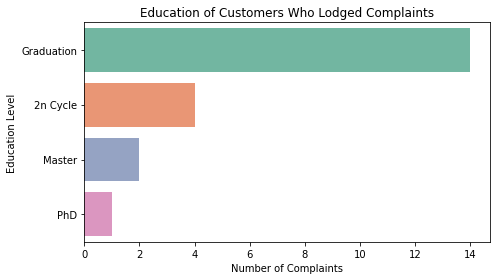

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_insights(df):
    # a. Top & bottom performing products by revenue
    product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    product_revenue = df[product_cols].sum().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="viridis")
    plt.title("Revenue by Product Category")
    plt.xlabel("Total Revenue")
    plt.ylabel("Product")
    plt.tight_layout()
    plt.show()

    # b. Correlation: Age vs Response to Last Campaign
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Response', y='Age', data=df, palette="Set2")
    plt.title("Customer Age vs Campaign Acceptance")
    plt.xlabel("Accepted Last Campaign (0=No, 1=Yes)")
    plt.ylabel("Age")
    plt.tight_layout()
    plt.show()

    # Pearson correlation between age and response
    corr_age_response = df[['Age', 'Response']].corr().iloc[0, 1]
    print(f"Correlation between Age and Campaign Acceptance: {corr_age_response:.3f}")

    # c. Country with highest campaign acceptance
    country_acceptance = df[df['Response'] == 1]['Country'].value_counts()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=country_acceptance.values, y=country_acceptance.index, palette="Blues")
    plt.title("Top Countries by Campaign Acceptance")
    plt.xlabel("Number of Accepted Responses")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

    # d. Children at home vs Total Spending
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Total_Children', y='Total_Spending', data=df, palette="Set3")
    plt.title("Total Spending by Number of Children at Home")
    plt.xlabel("Total Children")
    plt.ylabel("Total Spending")
    plt.tight_layout()
    plt.show()

    corr_children_spending = df[['Total_Children', 'Total_Spending']].corr().iloc[0, 1]
    print(f"Correlation between Children at Home and Total Spending: {corr_children_spending:.3f}")

    # e. Education of customers who complained
    complaint_edu = df[df['Complain'] == 1]['Education'].value_counts()

    plt.figure(figsize=(7, 4))
    sns.barplot(x=complaint_edu.values, y=complaint_edu.index, palette="Set2")
    plt.title("Education of Customers Who Lodged Complaints")
    plt.xlabel("Number of Complaints")
    plt.ylabel("Education Level")
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_insights(marketing_data_df)
